In [4]:
import numpy as np
import matplotlib.pyplot as plt   
from scipy import stats
import os

In [5]:
os.getcwd()

'/home/etienne/notebooks'

In [2]:
def go_edge(tseries):
    nregions=tseries.shape[1]
    Blen=tseries.shape[0]
    nedges=int(nregions**2/2-nregions/2)
    iTriup= np.triu_indices(nregions,k=1) 
    gz=stats.zscore(tseries)
    Eseries = gz[:,iTriup[0]]*gz[:,iTriup[1]]
    return Eseries

In [6]:
path='/home/etienne/data/target_dir/'

In [7]:
G = np.arange(0.3,0.98,0.01)
N= np.arange(0.005,0.055,0.005)

In [8]:
G=np.array([0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,
       0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51,
       0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62,
       0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73,
       0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84,
       0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95,
       0.96, 0.97])
N=np.array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 ])

In [9]:
Blen=1500
nregions=148

In [10]:
B=np.zeros((len(G),len(N),Blen,nregions))
for iig, ig in enumerate(G):
    for ii, i in enumerate(N):
        #print('mpr_mouse_A148_G' +str(ig)+'_nsigma' +str(i)+'_alpha0.0.npz')
        bold=np.load(path+'mpr_mouse_A148_G' +str(ig)+'_nsigma' +str(i)+'_alpha0.0.npz')['Bold_data'][-Blen:,0,:]
        if True not in np.unique(np.isnan(bold)):
            B[iig,ii,:,:]=bold
        else:
            B[iig,ii,:,:]=np.random.rand(Blen,nregions)

In [11]:
#bad example
Bbad=B[24,1,:,:]
#nice example
Bnice=B[31,9,:,:]


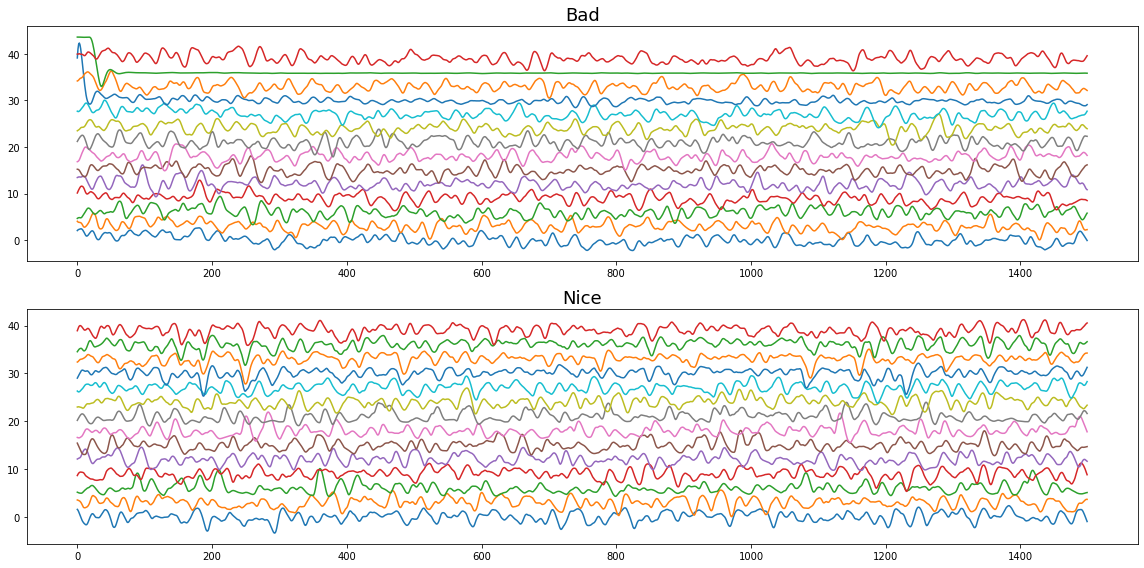

In [12]:
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.title('Bad',fontsize=18)
for i in range(14):
    plt.plot(stats.zscore(Bbad[:,i])+3*i)
plt.subplot(212)
plt.title('Nice',fontsize=18)
for i in range(14):
    plt.plot(stats.zscore(Bnice[:,i])+3*i)
plt.tight_layout()
plt.show()

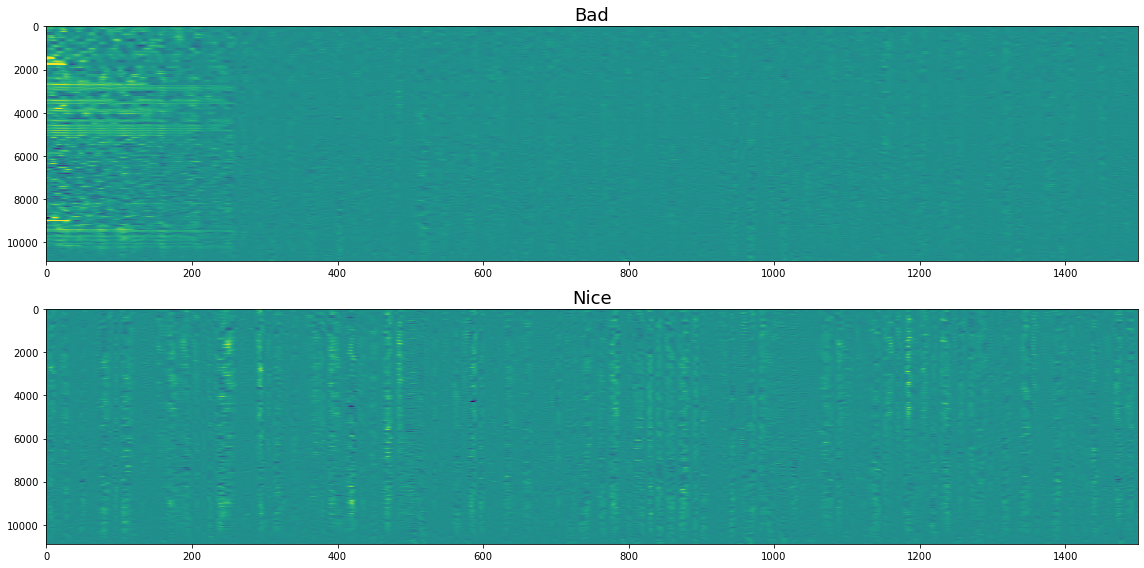

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.title('Bad',fontsize=18)
plt.imshow(go_edge(Bbad).T,vmin=-5.,vmax=5.,aspect='auto')
plt.subplot(212)
plt.title('Nice',fontsize=18)
plt.imshow(go_edge(Bnice).T,vmin=-5.,vmax=5.,aspect='auto')
plt.tight_layout()
plt.show()

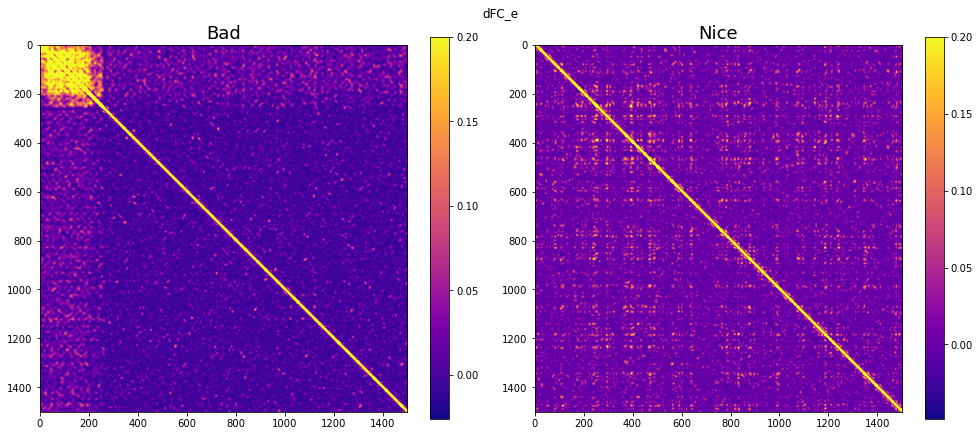

In [38]:
plt.figure(figsize=(14,6))
plt.suptitle('dFC_e')
plt.subplot(121)
plt.title('Bad',fontsize=18)
plt.imshow(np.corrcoef(go_edge(Bbad)),vmax=0.2,cmap='plasma')
plt.colorbar()
plt.subplot(122)
plt.title('Nice',fontsize=18)
plt.imshow(np.corrcoef(go_edge(Bnice)),vmax=0.2,cmap='plasma')
plt.colorbar()
plt.tight_layout()
plt.show()

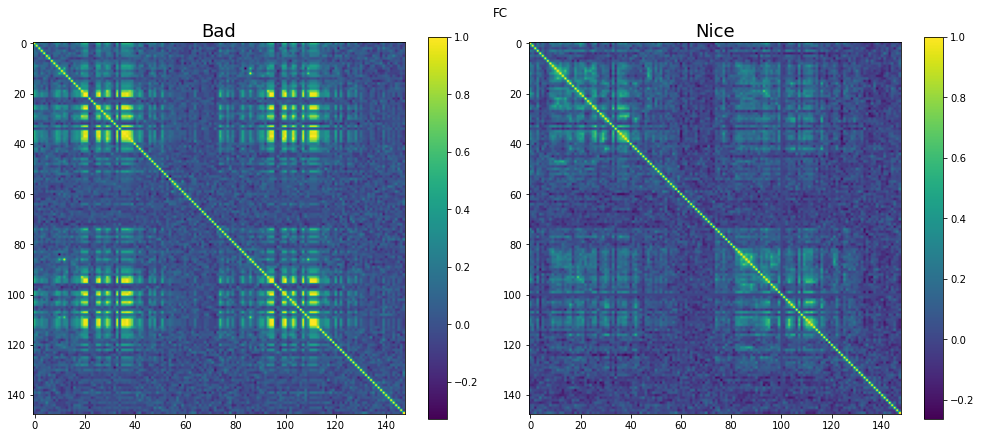

In [37]:
plt.figure(figsize=(14,6))
plt.suptitle('FC')
plt.subplot(121)
plt.title('Bad',fontsize=18)
plt.imshow(np.corrcoef(Bbad.T))
plt.colorbar()
plt.subplot(122)
plt.title('Nice',fontsize=18)
plt.imshow(np.corrcoef(Bnice.T))
plt.colorbar()
plt.tight_layout()
plt.show()

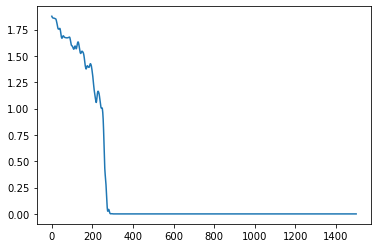

In [76]:
plt.plot(np.var(bold,axis=1))

In [13]:
def reg_measure(Bold_sim,n=20):
    V=np.var(Bold_sim,axis=0)
    S=np.sum(V[np.argsort(V)[-n::]])
    return(S)

In [14]:
def triangle_measure(Bold_sim):
    C=np.corrcoef(go_edge(Bold_sim))
    T=C[np.triu_indices(C.shape[0],k=1)]
    var=np.var(T)
    return(var)

In [15]:
MEASURER=np.zeros((len(G),len(N)))
MEASURET=np.zeros((len(G),len(N)))
couple=np.zeros((len(G),len(N),2))

for ii, i in enumerate(G):
    for jj, j in enumerate(N):
        MEASURER[ii,jj]=-reg_measure(B[ii,jj,:,:])
        MEASURET[ii,jj]=triangle_measure(B[ii,jj,:,:])
        couple[ii,jj]=[i,j]
cou=couple.reshape((680,-1,2))[:,0,:]

In [62]:
cou=couple.reshape((680,-1,2))[:,0,:]

In [71]:
mT=MEASURET.flatten()
mR=-MEASURER.flatten()
MT=stats.zscore(mT[np.isnan(mT)==False])
MR=stats.zscore(mR[np.isnan(mT)==False])
coup=cou[np.isnan(mT)==False,:]

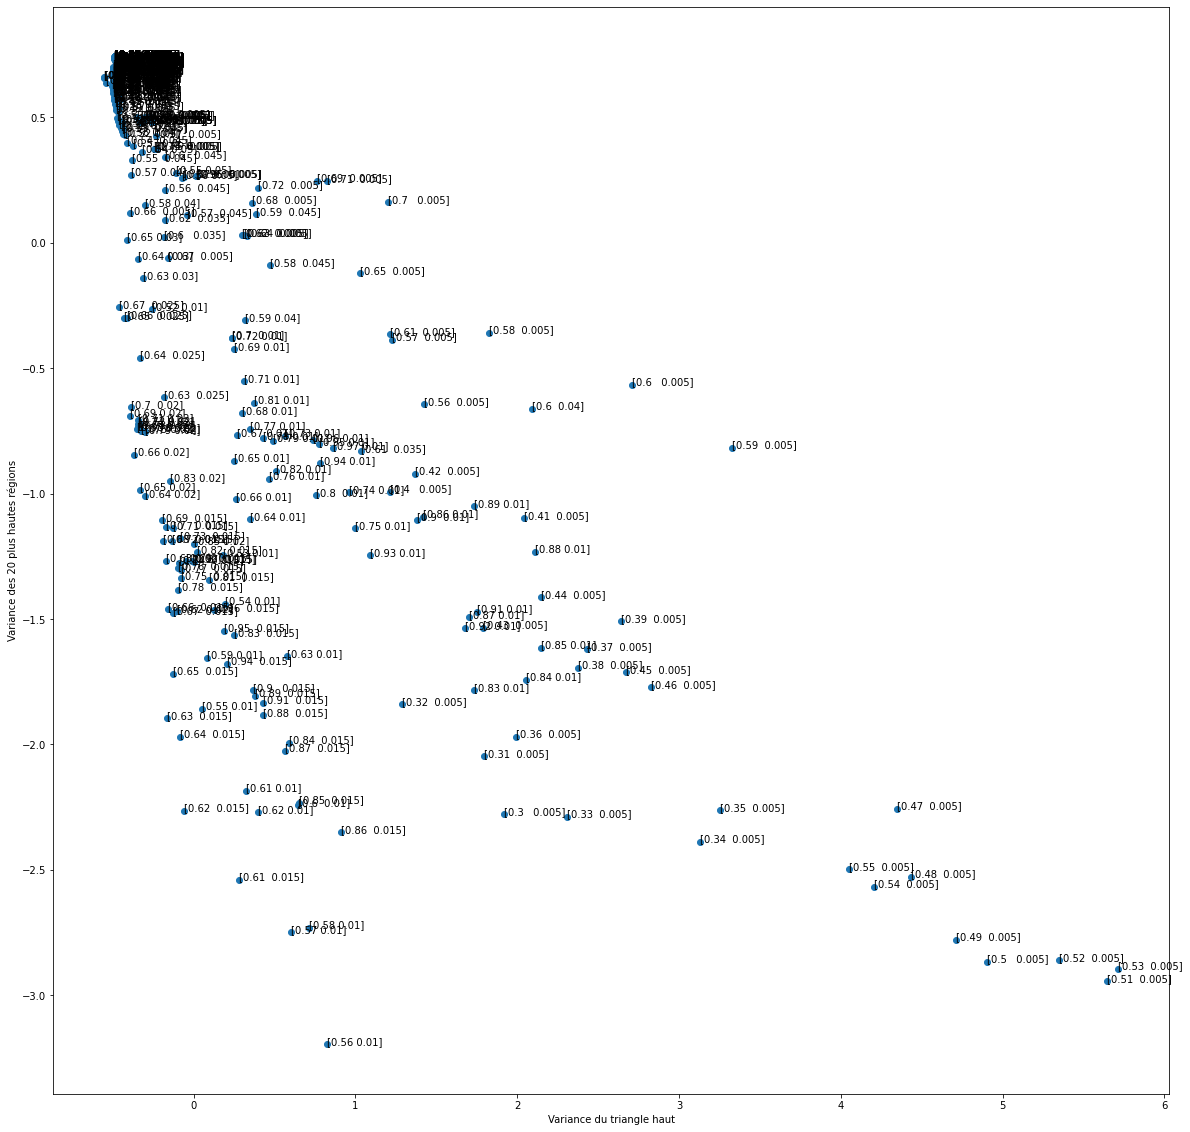

In [75]:
annotations = coup

plt.figure(figsize=(20,20))
plt.scatter(MT,MR)
plt.xlabel('Variance du triangle haut')
plt.ylabel('Variance des 20 plus hautes régions')
for i, label in enumerate(annotations):
    plt.annotate(label, (MT[i], MR[i]))
plt.show()

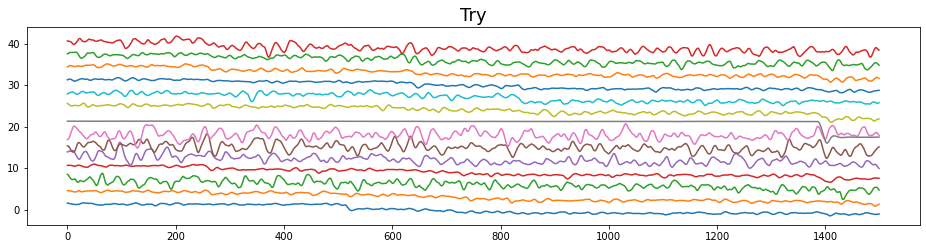

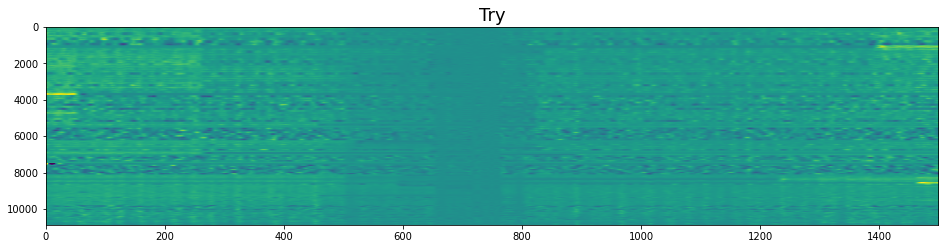

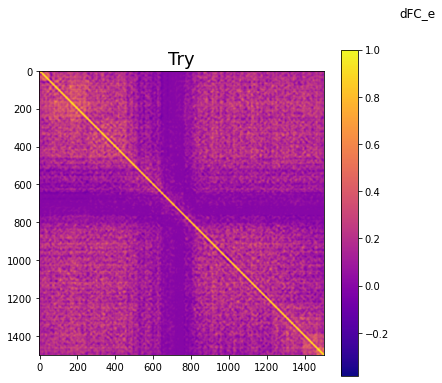

In [82]:
Btry=B[21,0,:,:]
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.title('Try',fontsize=18)
for i in range(14):
    plt.plot(stats.zscore(Btry[:,i])+3*i)

plt.figure(figsize=(16,8))
plt.subplot(211)
plt.title('Try',fontsize=18)
plt.imshow(go_edge(Btry).T,vmin=-5.,vmax=5.,aspect='auto')

plt.figure(figsize=(14,6))
plt.suptitle('dFC_e')
plt.subplot(121)
plt.title('Try',fontsize=18)
plt.imshow(np.corrcoef(go_edge(Btry)),cmap='plasma')
plt.colorbar()

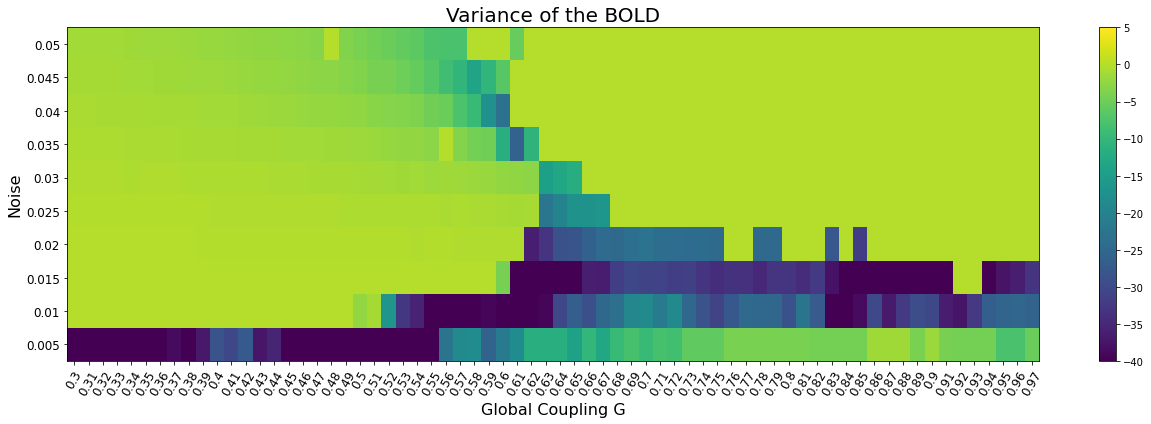

In [89]:
plt.figure(figsize=(18,6))
mx=np.max(np.abs(MEASURER))
plt.imshow(-MEASURER[:,::-1].T,aspect='auto',interpolation='nearest',cmap='viridis',vmax=5,vmin=-40);
plt.xticks(np.arange(len(G)),np.around(G,3),rotation=60,fontsize=12);
plt.yticks(np.arange(len(N)),np.around(N,3)[::-1],fontsize=12);plt.title('Variance of the BOLD', fontsize=20);
plt.colorbar();plt.xlabel('Global Coupling G',fontsize=16);plt.ylabel('Noise',fontsize=16);
plt.tight_layout()
plt.show()

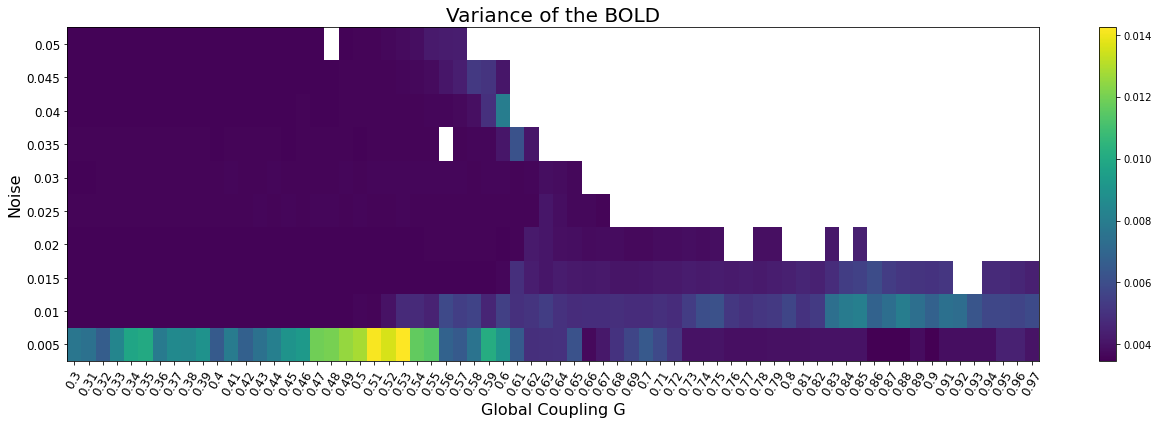

In [80]:
plt.figure(figsize=(18,6))
mx=np.max(np.abs(MEASURET))
plt.imshow(MEASURET[:,::-1].T,aspect='auto',interpolation='nearest',cmap='viridis');
plt.xticks(np.arange(len(G)),np.around(G,3),rotation=60,fontsize=12);
plt.yticks(np.arange(len(N)),np.around(N,3)[::-1],fontsize=12);plt.title('Variance of the BOLD', fontsize=20);
plt.colorbar();plt.xlabel('Global Coupling G',fontsize=16);plt.ylabel('Noise',fontsize=16);
plt.tight_layout()
plt.show()